In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from urllib.request import urlopen

In [2]:
url_base = "http://movie.naver.com/"
url_syb = "/movie/sdb/rank/rmovie.nhn?sel=cur&date=20180821"

page = urlopen(url_base + url_syb)

soup = BeautifulSoup(page, "html.parser")
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20180821" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta cont

In [3]:
soup.find_all('div', 'tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=157243" title="당갈">당갈</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=167787" title="허스토리">허스토리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=39636" title="지금, 만나러 갑니다">지금, 만나러 갑니다</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=173019" title="명탐정 코난 : 제로의 집행인">명탐정 코난 : 제로의 집행인</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136990" title="인크레더블 2">인크레더블 2</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=175727" title="극장판 헬로카봇 : 백악기 시대">극장판 헬로카봇 : 백악기 시대</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=172174" title="어느 가족">어느 가족</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=144379" title="러빙 빈센트">러빙 빈센트</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=134772"

In [4]:
soup.find_all('div', 'tit5')[0].a.string

'당갈'

In [5]:
soup.find_all('td', 'point')[0].string

'9.52'

In [6]:
date = pd.date_range('2018-5-1', periods=100, freq='D')
date

DatetimeIndex(['2018-05-01', '2018-05-02', '2018-05-03', '2018-05-04',
               '2018-05-05', '2018-05-06', '2018-05-07', '2018-05-08',
               '2018-05-09', '2018-05-10', '2018-05-11', '2018-05-12',
               '2018-05-13', '2018-05-14', '2018-05-15', '2018-05-16',
               '2018-05-17', '2018-05-18', '2018-05-19', '2018-05-20',
               '2018-05-21', '2018-05-22', '2018-05-23', '2018-05-24',
               '2018-05-25', '2018-05-26', '2018-05-27', '2018-05-28',
               '2018-05-29', '2018-05-30', '2018-05-31', '2018-06-01',
               '2018-06-02', '2018-06-03', '2018-06-04', '2018-06-05',
               '2018-06-06', '2018-06-07', '2018-06-08', '2018-06-09',
               '2018-06-10', '2018-06-11', '2018-06-12', '2018-06-13',
               '2018-06-14', '2018-06-15', '2018-06-16', '2018-06-17',
               '2018-06-18', '2018-06-19', '2018-06-20', '2018-06-21',
               '2018-06-22', '2018-06-23', '2018-06-24', '2018-06-25',
      

In [7]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = "http://movie.naver.com/" + \
                                    "movie/sdb/rank/rmovie.nhn?sel=cur&date={date}"
    response = urlopen(html.format(date=
                                   urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, "html.parser")
    end = len(soup.find_all('td', 'point'))
    
    movie_date.extend([today for n in range(0, end)]) 
    movie_name.extend([soup.find_all('div', 'tit5')[n].a.string for n in range(0, end)])
    movie_point.extend([soup.find_all('td', 'point')[n].string for n in range(0, end)])

In [8]:
len(movie_date), len(movie_name), len(movie_point)

(4254, 4254, 4254)

In [9]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2018-05-01,당갈,9.53
1,2018-05-01,덕구,9.50
2,2018-05-01,원더,9.40
3,2018-05-01,위대한 쇼맨,9.38
4,2018-05-01,"지금, 만나러 갑니다",9.33


In [10]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.sum)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,point
name,
어벤져스: 인피니티 워,896.96
소공녀,888.80
당갈,863.85
킹 오브 프리즘 프라이드 더 히어로,629.49
"부르고뉴, 와인에서 찾은 인생",577.00


In [11]:
tmp = movie.query('name == ["당갈"]')
tmp

,date,name,point
0,2018-05-01,당갈,9.53
50,2018-05-02,당갈,9.57
100,2018-05-03,당갈,9.57
150,2018-05-04,당갈,9.55
200,2018-05-05,당갈,9.58
250,2018-05-06,당갈,9.59
295,2018-05-07,당갈,9.61
337,2018-05-08,당갈,9.60
377,2018-05-09,당갈,9.60
417,2018-05-10,당갈,9.61


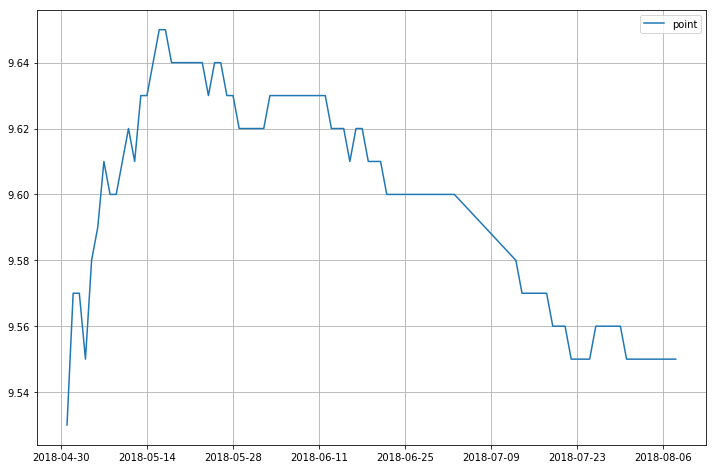

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(tmp['date'], tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [13]:
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])

movie_pivot.head()

point                                                              \
name       12 솔져스    4등 500일의 썸머 B급 며느리 개들의 섬 건축학개론 걸어도 걸어도 게이트 경성학교: 사라진 소녀들   
date                                                                            
2018-05-01   8.35  8.53      NaN   8.41   NaN   NaN     NaN NaN           NaN   
2018-05-02   8.33  8.53      NaN   8.41   NaN   NaN     NaN NaN           NaN   
2018-05-03   8.31  8.53      NaN   8.41   NaN   NaN     NaN NaN           NaN   
2018-05-04   8.31  8.53      NaN   8.41   NaN   NaN     NaN NaN           NaN   
2018-05-05    NaN  8.53      NaN    NaN   NaN   NaN     NaN NaN           NaN   

                        ...                                             \
name       고양이를 빌려드립니다  ...  폭스캐처 플로리다 프로젝트 피아니스트 피터 래빗 한 솔로: 스타워즈 스토리   
date                    ...                                              
2018-05-01         NaN  ...   NaN      8.53   NaN   NaN            NaN   
2018-05-02         NaN  ...   NaN      8.54   NaN   NaN            NaN   
2018-05-03         NaN  ...   NaN      8.53   NaN   NaN            NaN   
2018-05-04         NaN  ...   NaN      8.53   NaN   NaN            NaN   
2018-05-05         NaN  ...   NaN      8.53   NaN   NaN            NaN   

                                              
name       한여름의 판타지아 허스토리 현기증 호텔 아르테미스 환상의 빛  
date                                          
2018-05-01       NaN  NaN NaN      NaN  8.01  
2018-05-02       NaN  NaN NaN      NaN  8.01  
2018-05-03       NaN  NaN NaN      NaN  8.01  
2018-05-04       NaN  NaN NaN      NaN  8.01  
2018-05-05       NaN  NaN NaN      NaN  8.01  

[5 rows x 191 columns]

In [14]:
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,12 솔져스,4등,500일의 썸머,B급 며느리,개들의 섬,건축학개론,걸어도 걸어도,게이트,경성학교: 사라진 소녀들,고양이를 빌려드립니다,...,폭스캐처,플로리다 프로젝트,피아니스트,피터 래빗,한 솔로: 스타워즈 스토리,한여름의 판타지아,허스토리,현기증,호텔 아르테미스,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2018-05-01,8.35,8.53,NaN,8.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.01
2018-05-02,8.33,8.53,NaN,8.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.01
2018-05-03,8.31,8.53,NaN,8.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.01
2018-05-04,8.31,8.53,NaN,8.41,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.01
2018-05-05,NaN,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.01


In [15]:
import platform
path="c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == "Darwin":
    rc('font', family='AppleGothic')
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


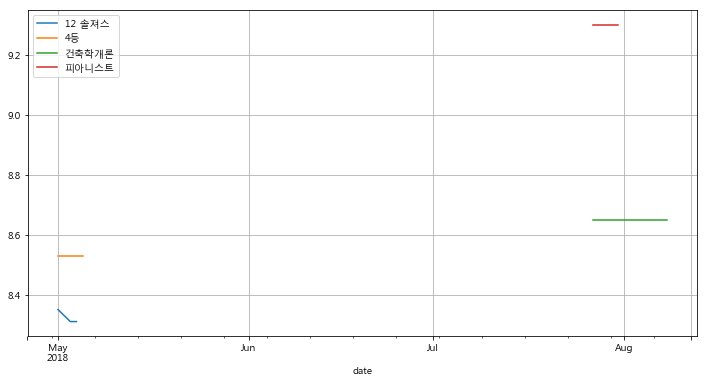

In [16]:
movie_pivot.plot(y=['12 솔져스','4등','건축학개론','피아니스트'], figsize=(12,6))
plt.legend(loc='best')
plt.grid()
plt.show()